## How does the genre of a movie influence the type of ending it has (happy, tragic, open-ended)? Certain genres may have a higher likelihood of happy or tragic endings.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# path
DATA_FOLDER = '../data/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_final.tsv'

# Dataset loading
movies = pd.read_csv(MOVIE_DATASET, sep='\t')


What kind of genres do we have in this dataset ? And how many movies for each genre ?

In [4]:
# Get rid of the rows with no score
movies = movies.dropna(subset=['Score'])

#Count genres
genre_counts = movies['Genres'].str.split(', ').explode().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Number of movies']
genre_counts = genre_counts.sort_values(by='Number of movies', ascending=False)
print("Number of genres: ", len(genre_counts))

Number of genres:  346


## Cleaning and Filtering Movie Genres

We observe that we have 346 different movie genres. We will keep only the most common ones, and regroup the same genres that have not the exact same string.

In [7]:
# Filter out genres with less than 500 movies
genre_counts = genre_counts[genre_counts['Number of movies'] > 500]
genre_counts['Genre'] = genre_counts['Genre'].str.lower()
print("Number of genres of our interest for our analysis: ", len(genre_counts))

Number of genres of our interest for our analysis:  36


In [10]:
# Plot the number of movies in each genre 
plt.figure(figsize=(20, 10))
plt.bar(genre_counts['Genre'], genre_counts['Number of movies'])
plt.xticks(rotation=45)
plt.xlabel('Movie genre')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')
plt.show()

#Save plot in a new rq1 folder in the the new results folder in the src folder
#create a new folder for the results in the src folder


KeyboardInterrupt: 

In [ ]:

# %% [markdown]
# ## Cleaning and Filtering Movie Genres

# %% [markdown]
print("We observe that we have 333 different movie genres. We will keep only the most common ones (some genres have only one or a few films")

# %%

genre_counts = genre_counts[genre_counts['Number of movies'] > 500]

genre_counts['Genre'] = genre_counts['Genre'].str.lower()

print("Number of genres of our interest for our analysis: ", len(genre_counts))

# %%
# Plot the number of movies in each genre 
plt.figure(figsize=(20, 10))
plt.bar(genre_counts['Genre'], genre_counts['Number of movies'])
plt.xticks(rotation=45)
plt.xlabel('Movie genre')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')
plt.show()

# %% [markdown]
# Now that we have cleaned, regrouped and selected the movie genres, we will create a new dataset with only the movies that have any of these genres of our interest. 

# %%
# Copy the movies dataframe into a new dataframe called movies_genres that has a row for each genre of each movie (with only the genres kept in genre counts)
movies_genres = movies.copy()
movies_genres = movies_genres.dropna(subset=['Movie genres'])
movies_genres['Movie genres'] = movies_genres['Movie genres'].str.split(', ')
movies_genres = movies_genres.explode('Movie genres')
movies_genres = movies_genres.reset_index(drop=True)
movies_genres['Movie genres'] = movies_genres['Movie genres'].str.lower()


# %%
# Remove the rows of the movies_genres dataframe that have a genre that is not in the genre_counts dataframe
movies_genres = movies_genres[movies_genres['Movie genres'].isin(genre_counts['Genre'])]
movies_genres = movies_genres.reset_index(drop=True)
movies_genres.head(10)
print("We created a new dataframe movies_genre, in which there is a row for each genre of one movie. We keep only the rows for which the genre is part of our list of genres of interest. After that we have a clean dataframe of our interest, ready to be analyzed.")
# %% [markdown]
# Now that we have clean data with only the most relevant genres for each film, we can anlayze it.

# %% [markdown]
# ## Analysis of the ending depending on the movie genres

# %% [markdown]
# First we can observe the mean score of ending for each movie genre.

# %%
# Mean ending score for each genre
genre_scores = movies_genres.groupby('Movie genres').agg({'Score': 'mean', 'Movie genres': 'count'})
genre_scores.columns = ['Mean score', 'Number of movies']
genre_scores = genre_scores.reset_index()
genre_scores = genre_scores.sort_values(by='Mean score', ascending=True)
genre_scores = genre_scores.reset_index(drop=True)

# Plot of the average score of the movie genres from best to worst ending score
plt.figure(figsize=(20, 10))
plt.barh(genre_scores['Movie genres'], genre_scores['Mean score'])
plt.xlim(0, 5)
plt.xlabel('Mean score')
plt.ylabel('Genre')
plt.title('Average ending score of the movies genres from highest to lowest score')
plt.show()

# %%
#Sort the genre_scores by mean score
genre_high_scores = genre_scores.sort_values(by='Mean score', ascending=False)

#Print the genre and score of the 5 genres with the highest mean score
print("The 5 genres with the highest mean score are:")
print(genre_high_scores.head(5))

#Print the 5 genres with the lowest mean score
print("The 5 genres with the lowest mean score are:")
print(genre_high_scores.tail(5))

#Distibution of the scores for the worst and best genres
worst_genre = genre_high_scores.tail(1)['Movie genres'].values[0]
best_genre = genre_high_scores.head(1)['Movie genres'].values[0]

worst_genre_scores = movies_genres[movies_genres['Movie genres'] == worst_genre]['Score']
best_genre_scores = movies_genres[movies_genres['Movie genres'] == best_genre]['Score']

#PLot a histogram where the x axis is the score from 1 to 5 and the y axis is the number of movies that have this score, but for each score I want two bars one for the worst genre and one for the best genre
plt.figure(figsize=(20, 10))
plt.hist([worst_genre_scores, best_genre_scores], bins=20, range=(1, 5), label=[worst_genre, best_genre])
plt.xlabel('Score')
plt.ylabel('Number of movies')
plt.title('Distribution of ending scores for the genre with highest (fantasy) and lowest score (world cinema)')
plt.legend()
plt.show()


Now that we have cleaned, regrouped and selected the movie genres, we will create a new dataset with only the movies that have any of these 45 genres of our interest. 

In [ ]:
# Copy the movies dataframe into a new dataframe called movies_genres that contains exploses the list of strings in the 'Movie genres' column and so has a row for each genre of each movie
movies_genres = movies.copy()
movies_genres['Movie genres'] = movies_genres['Movie genres'].str.split(', ')
movies_genres = movies_genres.explode('Movie genres')
movies_genres = movies_genres.reset_index(drop=True)
movies_genres['Movie genres'] = movies_genres['Movie genres'].str.lower()
movies_genres.head(20)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,thriller,English Language,United States of America,3.0
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,science fiction,English Language,United States of America,3.0
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,horror,English Language,United States of America,3.0
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,adventure,English Language,United States of America,3.0
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,supernatural,English Language,United States of America,3.0
5,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,action,English Language,United States of America,3.0
6,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,space western,English Language,United States of America,3.0
7,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,mystery,English Language,United States of America,5.0
8,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,biographical film,English Language,United States of America,5.0
9,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,drama,English Language,United States of America,5.0


In this new dataframe movies_genre, there is a row for each genre of one movie. Now we will keep only the rows for which the genre is part of our list of genres of interest.

In [153]:
# Remove the rows of the movies_genres dataframe that have a genre that is not in the genre_counts dataframe
movies_genres = movies_genres[movies_genres['Movie genres'].isin(genre_counts['Genre'])]
movies_genres = movies_genres.reset_index(drop=True)
movies_genres.head(10)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,thriller,English Language,United States of America,3.0
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,science fiction,English Language,United States of America,3.0
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,horror,English Language,United States of America,3.0
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,adventure,English Language,United States of America,3.0
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,action,English Language,United States of America,3.0
5,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,mystery,English Language,United States of America,5.0
6,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,drama,English Language,United States of America,5.0
7,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,indie,"Silent film, English Language",United States of America,3.0
8,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,black-and-white,"Silent film, English Language",United States of America,3.0
9,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,comedy,"Silent film, English Language",United States of America,3.0


Now that we have clean data with only the most relevant genres for each film, we can anlayze it.

## Analysis of the ending depending on the movie genres

First we can observe the normalized mean score of ending for each movie genre.

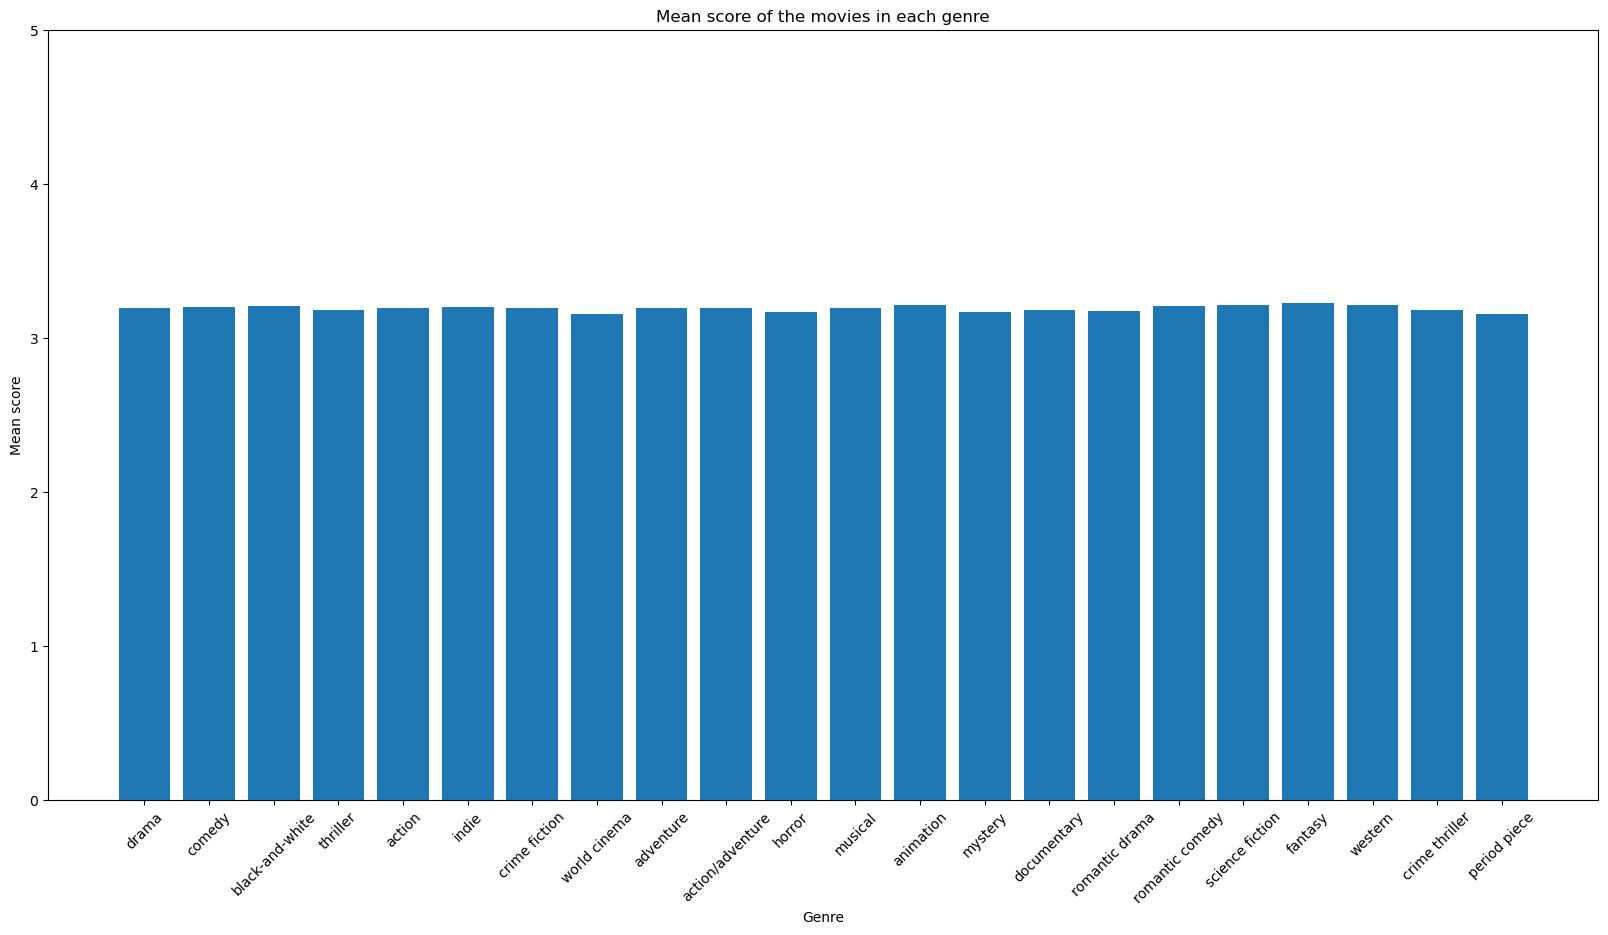

In [154]:
# For each genre, calculate the mean Score of the movies that have this genre and the number of movies that have this genre in the movies_genres dataframe
genre_scores = movies_genres.groupby('Movie genres').agg({'Score': 'mean', 'Movie genres': 'count'})
genre_scores.columns = ['Mean score', 'Number of movies']
genre_scores = genre_scores.reset_index()
genre_scores = genre_scores.sort_values(by='Number of movies', ascending=False)
genre_scores = genre_scores.reset_index(drop=True)

# Plot the mean score of the movies for the 10 genres that have the most movies in the movies_genres dataframe with a mean score axis going from zero to 5

plt.figure(figsize=(20, 10))
plt.bar(genre_scores['Movie genres'], genre_scores['Mean score'])
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Mean score')
plt.title('Mean score of the movies in each genre')
plt.ylim(0, 5)
plt.show()




In [156]:
genre_scores.head(15)

,Movie genres,Mean score,Number of movies
0,drama,3.191698,7950
1,comedy,3.198459,4152
2,black-and-white,3.205434,2429
3,thriller,3.177985,2253
4,action,3.195283,2120
5,indie,3.203485,1779
6,crime fiction,3.191057,1722
7,world cinema,3.153338,1363
8,adventure,3.192043,1307
9,action/adventure,3.191710,1158


Text(0.5, 1.0, 'Mean ending score of the 10 movie genres that have the highest mean ending score')

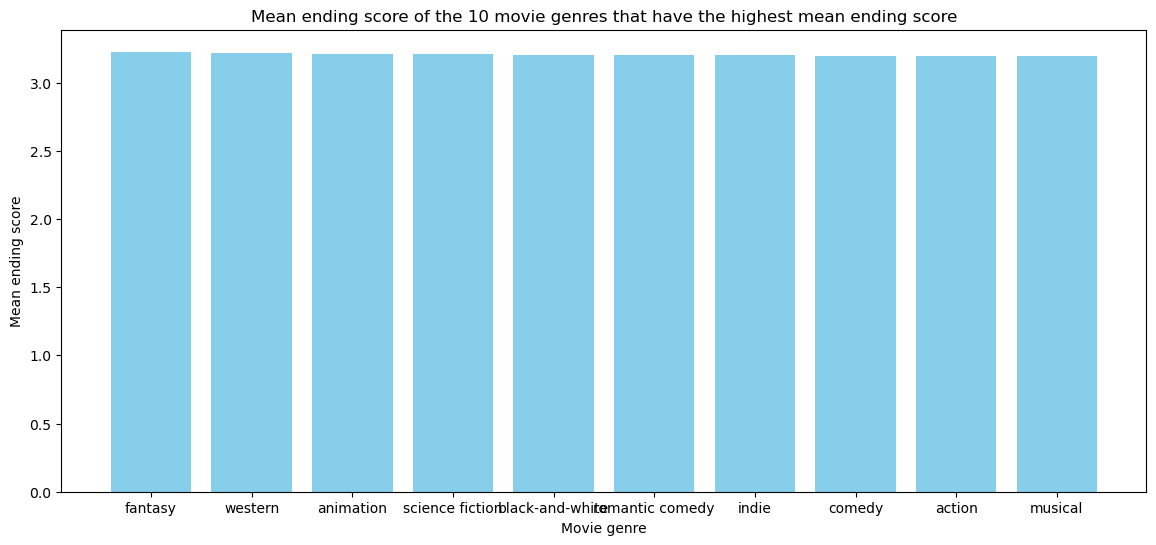

In [ ]:
# Plot the score of the 10 movie genres that have the highest mean score
genre_scores = genre_scores.sort_values(by='Mean score', ascending=False)
genre_scores = genre_scores.reset_index(drop=True)

plt.figure(figsize=(14, 6))
plt.bar(genre_scores['Movie genres'][:10], genre_scores['Mean score'][:10], color='skyblue')
plt.xlabel('Movie genre')
plt.ylabel('Mean ending score')
plt.title('Mean ending score of the 10 movie genres that have the highest mean ending score')


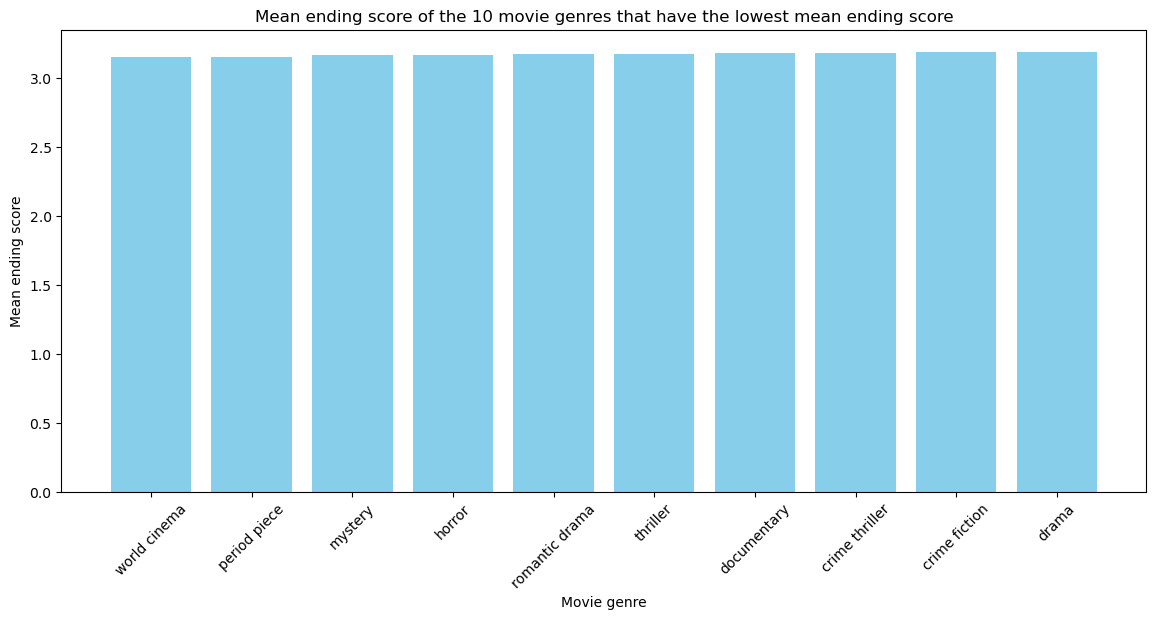

In [ ]:
# Sort the genre_scores dataframe by the lowest mean score
genre_scores = genre_scores.sort_values(by='Mean score', ascending=True)
genre_scores = genre_scores.reset_index(drop=True)

plt.figure(figsize=(14, 6))
plt.bar(genre_scores['Movie genres'][:10], genre_scores['Mean score'][:10], color='skyblue')
plt.xlabel('Movie genre')
plt.ylabel('Mean ending score')
plt.title('Mean ending score of the 10 movie genres that have the lowest mean ending score')
plt.xticks(rotation=45)
plt.show()


Pas ouf, comment améliorer? --> enlever plus de genres qui ont moins de movies ? plus les regrouper?

To observe correlation, we cannnot really use spearman or pearson cause not really suited for categorical data (movie genres in our case). We could maybe use a point - biserial correlation (special type of Pearson correlation) because it measures the relationship between a binary categorical variable (yes or no) and a continuous variable. We could use it for example in a case where we classifiy the genres such as action and no-action movies and see if there is a correlation in the ending scores.

For statistical dependency a t-test would be done between 2 genres for example romance movies and thriller, to see if there is a significant difference in the ending score.
To see if there is a significant difference in the ending score for all genres, we can perform an ANOVA test.

Let's start by performing an ANOVA (Analysis of Variance) test to see if there are statistically significant differences in ending scores among different genres.
Null hypothesis: There is no significant difference in the movie scores across different genres
Alternative Hypothesis: There is a significant difference in the mean movie scores across different genres.

CAREFUL: 
1) ANOVA assumes normally distributed data and similar variances across groups. With a large dataset, ANOVA is fairly robust to these assumptions, but it’s worth verifying if the assumptions hold.

2) NOVA only tells us if there is a difference somewhere among the genres, not which specific genres differ.

In [141]:
# ANOVA test
from scipy.stats import f_oneway

# Create a dictionary to store ending scores for each genre
genre_groups = movies_genres.groupby('Movie genres')['Score'].apply(list)

# Use f_oneway to perform ANOVA across all genre groups
anova_result = f_oneway(*genre_groups)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-statistic: 0.5615409600441515
ANOVA p-value: 0.9450240445103344


Interpretation: Since the p-value is very high, we cannot reject the null hypothesis. In other words, there isn't enough evidence to say that movie genres have a significant effect on the ending score.

T-TEST betwteen 2 genres

In [142]:
from scipy import stats

# Genres to compare
genre_1 = 'comedy'
genre_2 = 'thriller'

# Extract scores for the movies that belong to each genre
genre_1_scores = movies_genres[movies_genres['Movie genres'] == genre_1]['Score']
genre_2_scores = movies_genres[movies_genres['Movie genres'] == genre_2]['Score']

# Perform a t-test between the two genres' scores
t_stat, p_value = stats.ttest_ind(genre_1_scores.dropna(), genre_2_scores.dropna())

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 1.00641258043621
P-value: 0.3142551747194971


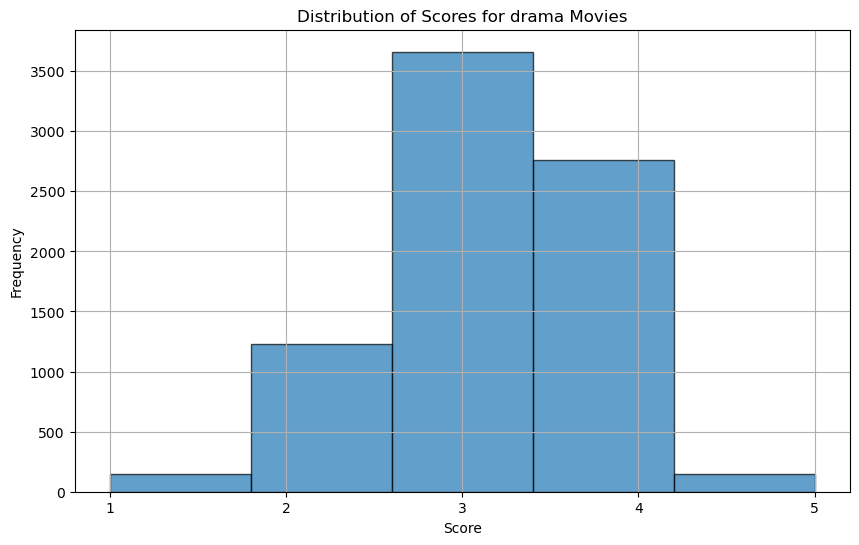

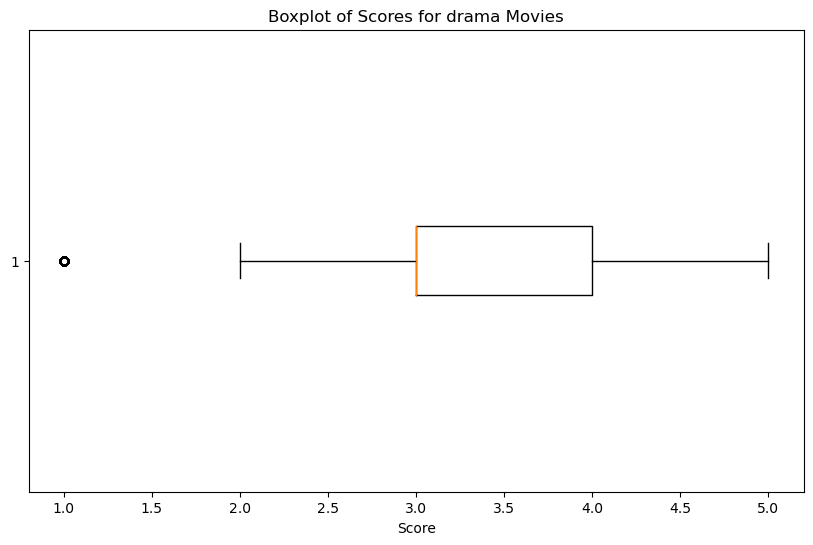

In [148]:
import matplotlib.pyplot as plt

# Extract the scores for Thriller movies
drama_scores = movies_genres[movies_genres['Movie genres'] == 'drama']['Score']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(drama_scores.dropna(), bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Scores for drama Movies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])  # Set x-axis ticks for score values
plt.grid(True)
plt.show()

# Optionally, you can also plot a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(drama_scores.dropna(), vert=False)
plt.title('Boxplot of Scores for drama Movies')
plt.xlabel('Score')
plt.show()


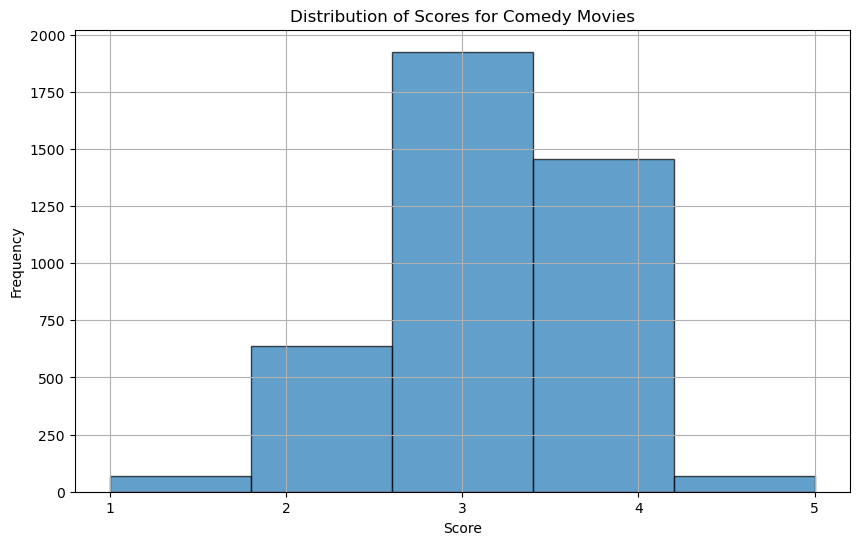

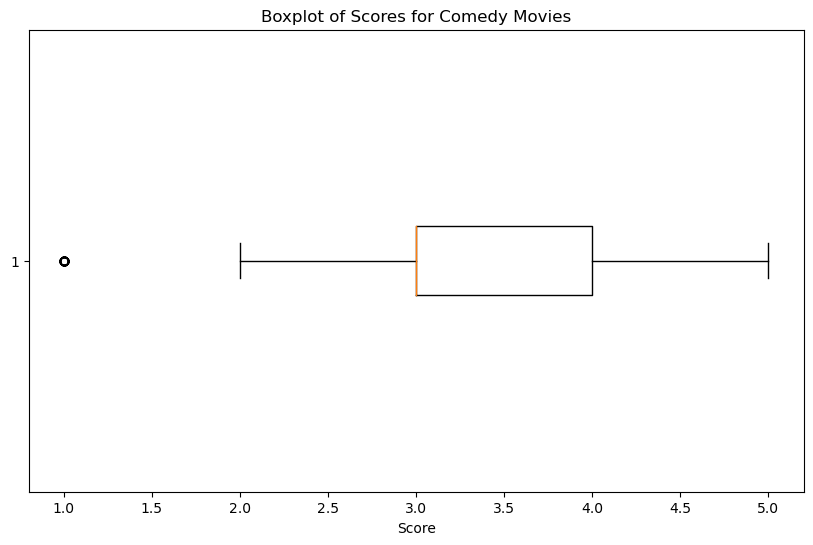

In [144]:
import matplotlib.pyplot as plt

# Extract the scores for Thriller movies
comedy_scores = movies_genres[movies_genres['Movie genres'] == 'comedy']['Score']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(comedy_scores.dropna(), bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Scores for Comedy Movies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])  # Set x-axis ticks for score values
plt.grid(True)
plt.show()

# Optionally, you can also plot a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(thriller_scores.dropna(), vert=False)
plt.title('Boxplot of Scores for Comedy Movies')
plt.xlabel('Score')
plt.show()


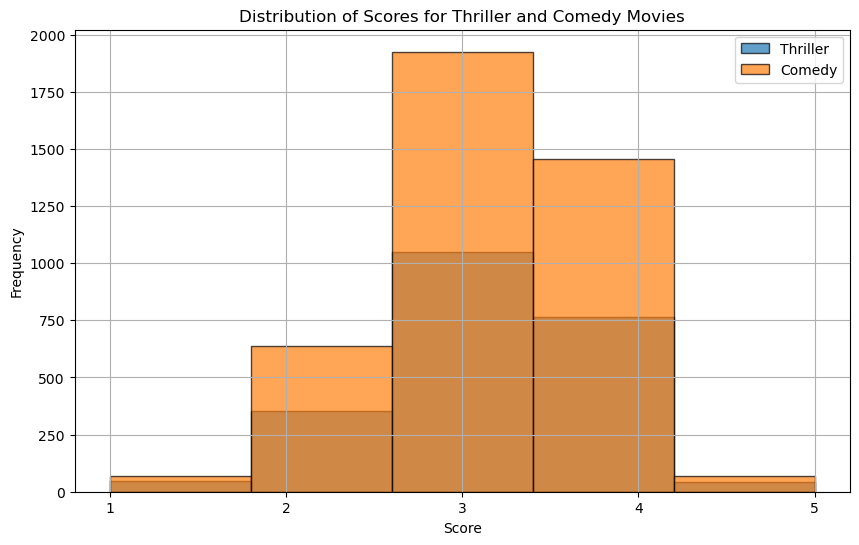

In [145]:
#plot score for thriller and comedy movies together
plt.figure(figsize=(10, 6))
plt.hist(thriller_scores.dropna(), bins=5, edgecolor='black', alpha=0.7, label='Thriller')
plt.hist(comedy_scores.dropna(), bins=5, edgecolor='black', alpha=0.7, label='Comedy')
plt.title('Distribution of Scores for Thriller and Comedy Movies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])  # Set x-axis ticks for score values
plt.legend()
plt.grid(True)
plt.show()


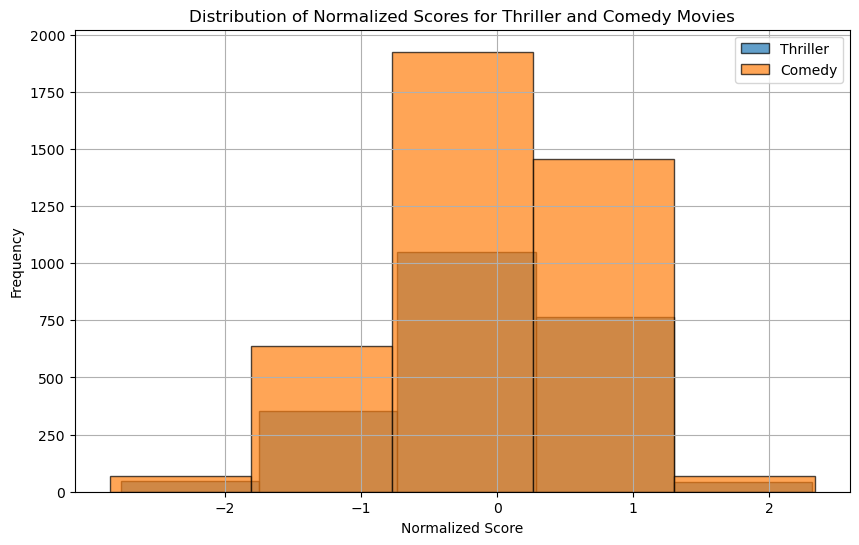

In [146]:
#normalize the scores for thriller and comedy movies
thriller_scores_normalized = (thriller_scores - thriller_scores.mean()) / thriller_scores.std()
comedy_scores_normalized = (comedy_scores - comedy_scores.mean()) / comedy_scores.std()

#plot normalized scores for thriller and comedy movies together
plt.figure(figsize=(10, 6))
plt.hist(thriller_scores_normalized.dropna(), bins=5, edgecolor='black', alpha=0.7, label='Thriller')
plt.hist(comedy_scores_normalized.dropna(), bins=5, edgecolor='black', alpha=0.7, label='Comedy')
plt.title('Distribution of Normalized Scores for Thriller and Comedy Movies')
plt.xlabel('Normalized Score')
plt.ylabel('Frequency')
plt.xticks([-2, -1, 0, 1, 2])  # Set x-axis ticks for normalized score values
plt.legend()
plt.grid(True)
plt.show()













